In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Social_Network_Ads.csv')

# Select features and target variable
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values

# Split the dataset into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Implementing logistic regression from scratch

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = -(1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    for _ in range(iterations):
        h = sigmoid(X.dot(theta))
        gradient = X.T.dot(h - y) / m
        theta -= learning_rate * gradient
    return theta

# Add a column of ones to X_train for the bias term
X_train_with_bias = np.c_[np.ones((len(X_train), 1)), X_train]

# Add a column of ones to X_test for the bias term
X_test_with_bias = np.c_[np.ones((len(X_test), 1)), X_test]

# Initialize parameters
theta_scratch = np.zeros(X_train_with_bias.shape[1])

# Set hyperparameters
learning_rate_scratch = 0.01
iterations_scratch = 1000

# Train the model
theta_scratch = gradient_descent(X_train_with_bias, y_train, theta_scratch, learning_rate_scratch, iterations_scratch)

# Predictions
predictions_scratch = sigmoid(X_test_with_bias.dot(theta_scratch))
predictions_scratch = (predictions_scratch >= 0.5).astype(int)

# Evaluate the model from scratch
accuracy_scratch = accuracy_score(y_test, predictions_scratch)
print("Accuracy (from scratch):", accuracy_scratch)

# Implement logistic regression using scikit-learn

# Create a logistic regression model
model_sklearn = LogisticRegression(random_state=0)

# Train the model
model_sklearn.fit(X_train, y_train)

# Predictions
predictions_sklearn = model_sklearn.predict(X_test)

# Evaluate the model using scikit-learn
accuracy_sklearn = accuracy_score(y_test, predictions_sklearn)
print("Accuracy (scikit-learn):", accuracy_sklearn)


Accuracy (from scratch): 0.3416666666666667
Accuracy (scikit-learn): 0.6583333333333333


<ipython-input-8-973afc34e534>:21: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Social_Network_Ads.csv')

# Select features and target variable
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values

# Split the dataset into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Add a column of ones to X_train_normalized for the bias term
X_train_normalized_with_bias = np.c_[np.ones((len(X_train_normalized), 1)), X_train_normalized]

# Add a column of ones to X_test_normalized for the bias term
X_test_normalized_with_bias = np.c_[np.ones((len(X_test_normalized), 1)), X_test_normalized]

# Implementing logistic regression from scratch
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = -(1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    for _ in range(iterations):
        h = sigmoid(X.dot(theta))
        gradient = X.T.dot(h - y) / m
        theta -= learning_rate * gradient
    return theta

# Initialize parameters
theta_scratch = np.zeros(X_train_normalized_with_bias.shape[1])

# Set hyperparameters
learning_rate_scratch = 0.01
iterations_scratch = 1000

# Train the model
theta_scratch = gradient_descent(X_train_normalized_with_bias, y_train, theta_scratch, learning_rate_scratch, iterations_scratch)

# Predictions
predictions_scratch = sigmoid(X_test_normalized_with_bias.dot(theta_scratch))
predictions_scratch = (predictions_scratch >= 0.5).astype(int)

# Evaluate the model from scratch
accuracy_scratch = accuracy_score(y_test, predictions_scratch)
print("Accuracy (from scratch):", accuracy_scratch)

# Implement logistic regression using scikit-learn

# Create a logistic regression model
model_sklearn = LogisticRegression(random_state=0)

# Train the model
model_sklearn.fit(X_train_normalized, y_train)

# Predictions
predictions_sklearn = model_sklearn.predict(X_test_normalized)

# Evaluate the model using scikit-learn
accuracy_sklearn = accuracy_score(y_test, predictions_sklearn)
print("Accuracy (scikit-learn):", accuracy_sklearn)



Accuracy (from scratch): 0.6583333333333333
Accuracy (scikit-learn): 0.8416666666666667


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Social_Network_Ads.csv')

# Select features and target variable
X = data.iloc[:, [2, 3]].values  # Choose relevant columns for features
y = data.iloc[:, 4].values

# Split the dataset into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the features using z-score normalization
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Add a column of ones to X_train_standardized for the bias term
X_train_standardized_with_bias = np.c_[np.ones((len(X_train_standardized), 1)), X_train_standardized]

# Add a column of ones to X_test_standardized for the bias term
X_test_standardized_with_bias = np.c_[np.ones((len(X_test_standardized), 1)), X_test_standardized]

# Implement logistic regression from scratch

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = -(1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    for _ in range(iterations):
        h = sigmoid(X.dot(theta))
        gradient = X.T.dot(h - y) / m
        theta -= learning_rate * gradient
    return theta

# Initialize parameters
theta_scratch = np.zeros(X_train_standardized_with_bias.shape[1])

# Set hyperparameters
learning_rate_scratch = 0.01
iterations_scratch = 1000

# Train the model
theta_scratch = gradient_descent(X_train_standardized_with_bias, y_train, theta_scratch, learning_rate_scratch, iterations_scratch)

# Predictions
predictions_scratch = sigmoid(X_test_standardized_with_bias.dot(theta_scratch))
predictions_scratch = (predictions_scratch >= 0.5).astype(int)

# Evaluate the model from scratch
accuracy_scratch = accuracy_score(y_test, predictions_scratch)
print("Accuracy (from scratch):", accuracy_scratch)

# Implement logistic regression using scikit-learn

# Create a logistic regression model
model_sklearn = LogisticRegression(random_state=0)

# Train the model
model_sklearn.fit(X_train_standardized, y_train)

# Predictions
predictions_sklearn = model_sklearn.predict(X_test_standardized)

# Evaluate the model using scikit-learn
accuracy_sklearn = accuracy_score(y_test, predictions_sklearn)
print("Accuracy (scikit-learn):", accuracy_sklearn)


Accuracy (from scratch): 0.8666666666666667
Accuracy (scikit-learn): 0.8666666666666667


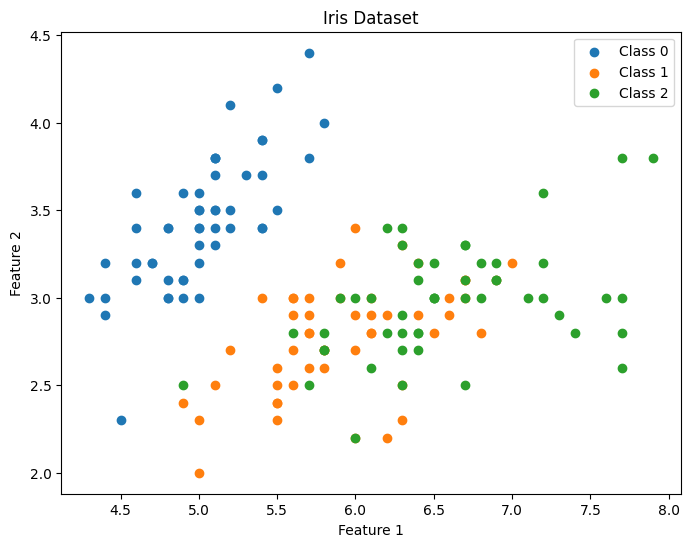

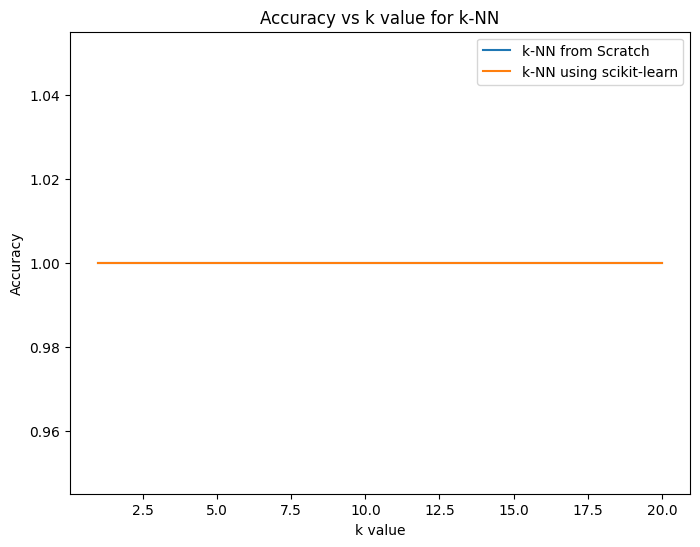

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Plot the dataset
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Class {i}')

plt.title("Iris Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Split the dataset into training and testing sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plot graph for accuracy vs k value
k_values = range(1, 21)  # Choose k values from 1 to 20
accuracy_scores = []

# Implement k-NN from scratch
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def k_nearest_neighbors(X_train, y_train, X_test, k):
    predictions = []
    for x_test in X_test:
        distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
        indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        predictions.append(most_common)
    return predictions

for k in k_values:
    predictions_scratch = k_nearest_neighbors(X_train, y_train, X_test, k)
    accuracy_scratch = accuracy_score(y_test, predictions_scratch)
    accuracy_scores.append(accuracy_scratch)

# Implement k-NN using scikit-learn
accuracy_scores_sklearn = []
for k in k_values:
    model_sklearn = KNeighborsClassifier(n_neighbors=k)
    model_sklearn.fit(X_train, y_train)
    predictions_sklearn = model_sklearn.predict(X_test)
    accuracy_sklearn = accuracy_score(y_test, predictions_sklearn)
    accuracy_scores_sklearn.append(accuracy_sklearn)

# Plot the accuracy vs k value graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_scores, label='k-NN from Scratch')
plt.plot(k_values, accuracy_scores_sklearn, label='k-NN using scikit-learn')
plt.title("Accuracy vs k value for k-NN")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
